# Introduction to TSR distance estimation

In [1]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


## Reading the database


In [2]:
# df = pd.HDFStore('store.h5')['df']

df = pd.read_pickle("store.pickle")


df.head()#17 10

,Z,currImage,currRect,egoMotion,focal,prevImage,prevRect
0,13.85,16-06-05_17-25-17_Single_0026_frame52.img,"[117, 202, 650, 736]","[[0.999999578399109, -0.000895476002401953, -0...",1612,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]"
1,16.7,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]","[[0.9999966311214874, -0.0025956984235227477, ...",1612,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]"
2,None,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]","[[0.9999998869381259, 0.00046968847719411973, ...",1612,16-06-05_17-25-17_Single_0026_frame49.img,"[299, 351, 605, 659]"


### Image principal point 

In [3]:
image = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')
print(image.im.shape)
print(image.origin)
print(image.rect)


(960, 1280)
[612 508]
[-612  668 -404  451]


### Focal length 

In [4]:
df['focal']

0    1612
1    1612
2    1612
Name: focal, dtype: int64

### Prev and current image rect

In [5]:
df[['prevRect','currRect']]

,prevRect,currRect
0,"[200, 268, 625, 701]","[117, 202, 650, 736]"
1,"[257, 317, 615, 677]","[200, 268, 625, 701]"
2,"[299, 351, 605, 659]","[257, 317, 615, 677]"


### Ego motion matrix

In [6]:
for em in df.egoMotion:
    print(em.shape)
    print(em)
    print()

(4, 4)
[[ 9.99999578e-01 -8.95476002e-04 -2.03283874e-04  5.62752837e-02]
 [ 8.95523797e-04  9.99999571e-01  2.35143793e-04 -5.88343605e-02]
 [ 2.03073221e-04 -2.35325740e-04  9.99999952e-01 -2.89097313e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

(4, 4)
[[ 9.99996631e-01 -2.59569842e-03 -9.76575490e-06  5.34051704e-02]
 [ 2.59569118e-03  9.99996400e-01 -6.80046032e-04 -5.12130713e-02]
 [ 1.15309142e-05  6.80018392e-04  9.99999769e-01 -2.88863401e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

(4, 4)
[[ 9.99999887e-01  4.69688477e-04  7.42729400e-05  5.69971963e-02]
 [-4.69526179e-04  9.99997535e-01 -2.17027886e-03 -4.87108894e-02]
 [-7.52921118e-05  2.17024375e-03  9.99997642e-01 -2.88552559e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]



### Display image

[117, 202, 650, 736]


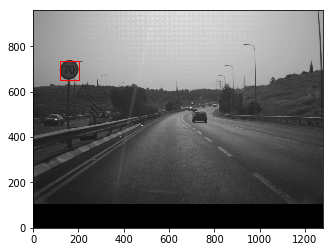

In [7]:
import matplotlib.patches as patches

# flip image vertically
plt.imshow(image.im,cmap='gray',origin='lower')
# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red")
rect = df.iloc[0].currRect
print(rect)
rect = patches.Rectangle(rect[::2],rect[1]-rect[0],rect[3]-rect[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(rect)

[200, 268, 625, 701]


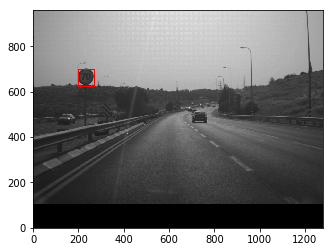

In [145]:
images = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame51.img')

plt.imshow(images.im,cmap='gray',origin='lower')
# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red")
rect = df.iloc[0].prevRect
print(rect)

rect = patches.Rectangle(rect[::2],rect[1]-rect[0],rect[3]-rect[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(rect)





[200, 268, 625, 701]


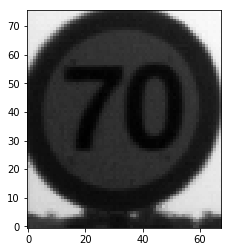

In [146]:
images = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame51.img')

rect = df.iloc[0].prevRect
print(rect)
simage = images.im[rect[2]:rect[3],rect[0]:rect[1]]
plt.imshow(simage,cmap='gray',origin='lower')


In [147]:
print(simage.shape)
sobel_kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])/8
sobel_kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])/8
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter,gaussian_filter
ix = sg.convolve2d(simage, sobel_kernelx, "same") 
iy = sg.convolve2d(simage, sobel_kernely, "same") 

iy2 = iy**2
ix2 = ix**2
ixy = ix*iy
sobel_kernely



(76, 68)


array([[ 0.125,  0.25 ,  0.125],
       [ 0.   ,  0.   ,  0.   ],
       [-0.125, -0.25 , -0.125]])

[ 2  2  2  2  2  5  8 11 14 16 18 18 21 24 31 37 37 40 42 45 45 46 46 48
 51 59 62 65 65 65 65] [ 2  6 20 59 73  4  4  3 53 73  5 28 28 49 54  2  4  2 33 33 50  2  7  2
 73  2  4  5 26 59 73]


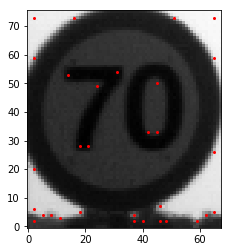

In [148]:
h , w = simage.shape
r = np.zeros((h, w))
result =np.zeros((h,w))
rmax = 0 
sx2 = sg.convolve2d(ix2, np.ones((5,5)), "same") 
sy2 = sg.convolve2d(iy2, np.ones((5,5)), "same") 
sxy = sg.convolve2d(ixy, np.ones((5,5)), "same") 
for i in range(h):
        for j in range(w):
            m = np.array([[sx2[i, j], sxy[i, j]], [sxy[i, j], sy2[i, j]]], dtype=np.float64)
            r[i, j] = 2*np.linalg.det(m)/ np.trace(m)
            if r[i,j] > rmax:
                rmax = r[i, j]
for i in range(h - 1):
        for j in range(w - 1):
            if   r[i, j] > rmax * 0.01 and r[i, j] > r[i - 1, j - 1] and r[i, j] > r[i, j + 1] and r[i, j] > r[i + 1, j] and r[i, j] > r[i - 1, j] and r[i, j] > r[i, j - 1]and r[i, j] > r[i - 1, j + 1] and r[i, j] > r[i + 1, j - 1] and r[i, j] > r[i + 1, j + 1]:
                result[i, j] = 1
result = np.transpose(result)
pc, pr = np.where(result == 1)
plt.imshow(simage,cmap='gray',origin='lower')
plt.plot(pc,pr, 'r',linestyle="None", marker="o", markersize=2)
print(pc,pr)
x1 = pc[11]
y1 = pr[11]
X1 = w
Y1 = h

[117, 202, 650, 736]


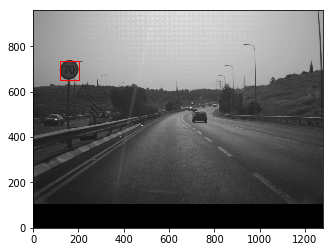

In [149]:

images = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')

plt.imshow(images.im,cmap='gray',origin='lower')
# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red")
rect = df.iloc[0].currRect
print(rect)

rect = patches.Rectangle(rect[::2],rect[1]-rect[0],rect[3]-rect[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(rect)

[117, 202, 650, 736]


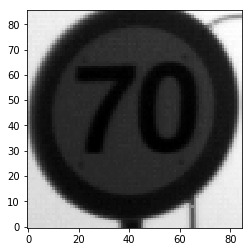

In [150]:
images = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')


# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red
rect = df.iloc[0].currRect
print(rect)
[117, 202, 650, 736]
simage = images.im[rect[2]:rect[3],rect[0]:rect[1]]
plt.imshow(simage,cmap='gray',origin='lower')

In [151]:
print(simage.shape)
sobel_kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])/8
sobel_kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])/8
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter,gaussian_filter
ix = sg.convolve2d(simage, sobel_kernelx, "same") 
iy = sg.convolve2d(simage, sobel_kernely, "same") 

iy2 = iy**2
ix2 = ix**2
ixy = ix*iy
sobel_kernely

(86, 85)


array([[ 0.125,  0.25 ,  0.125],
       [ 0.   ,  0.   ,  0.   ],
       [-0.125, -0.25 , -0.125]])

[ 2  2  2  2 20 21 22 24 27 28 32 35 41 46 57 62 62 64 65 66 68 72 74 82
 82 82 82] [ 2 25 60 83 59 61 83 31  2 31 56  2 62  2 58  2  7  9  2 83  2 79 83  2
 33 65 83]


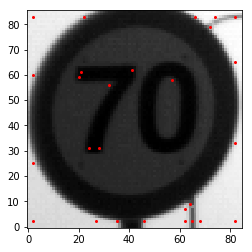

In [152]:
h , w = simage.shape

r = np.zeros((h, w))
result =np.zeros((h, w))
rmax = 0 
sx2 = sg.convolve2d(ix2, np.ones((5,5)), "same") 
sy2 = sg.convolve2d(iy2, np.ones((5,5)), "same") 
sxy = sg.convolve2d(ixy, np.ones((5,5)), "same") 
for i in range(h):
        for j in range(w):
            m = np.array([[sx2[i, j], sxy[i, j]], [sxy[i, j], sy2[i, j]]], dtype=np.float64)
            r[i, j] = 2*np.linalg.det(m)/ np.trace(m)
            if r[i,j] > rmax:
                rmax = r[i, j]
for i in range(h - 1):
        for j in range(w - 1):
            if   r[i, j] > rmax * 0.01 and r[i, j] > r[i - 1, j - 1] and r[i, j] > r[i, j + 1] and r[i, j] > r[i + 1, j] and r[i, j] > r[i - 1, j] and r[i, j] > r[i, j - 1]and r[i, j] > r[i - 1, j + 1] and r[i, j] > r[i + 1, j - 1] and r[i, j] > r[i + 1, j + 1]:
                result[i, j] = 1
result = np.transpose(result)
pc, pr = np.where(result == 1)
plt.imshow(simage,cmap='gray',origin='lower')
plt.plot(pc,pr, 'r',linestyle="None", marker="o", markersize=2)
print(pc,pr)
x2 = pc[7]
x2 = pr[7]
X2 = w
Y2 = h

In [ ]:
print(x1/X1,y1/Y1)
print(x2/X2,y2/Y2)


# Convolution using scipy

In [153]:
# create artifical image with constant positive slope 
my_image = np.arange(8) + np.arange(8)[:,np.newaxis] 
my_image.shape

(8, 8)

In [154]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
sobel_kernel

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [14]:
from scipy import signal as sg

In [15]:
# help(sg.convolve2d)

In [16]:
my_image

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [17]:
pdx = sg.convolve2d(my_image, sobel_kernel, "same") 
# pdx = sg.convolve2d(my_image, sobel_kernel, "valid") 
print(pdx.shape)
pdx

(8, 8)


array([[-0.5  , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 ,  2.375],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  3.5  ],
       [-1.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  4.   ],
       [-2.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  4.5  ],
       [-2.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  5.   ],
       [-3.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  5.5  ],
       [-3.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  6.   ],
       [-2.875, -0.75 , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 ,  4.75 ]])

## Maximum filter  

In [18]:
from scipy.ndimage.filters import maximum_filter

In [19]:
# help(maximum_filter)

In [20]:
my_image

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [21]:
maximum_filter(my_image, 3)

array([[ 2,  3,  4,  5,  6,  7,  8,  8],
       [ 3,  4,  5,  6,  7,  8,  9,  9],
       [ 4,  5,  6,  7,  8,  9, 10, 10],
       [ 5,  6,  7,  8,  9, 10, 11, 11],
       [ 6,  7,  8,  9, 10, 11, 12, 12],
       [ 7,  8,  9, 10, 11, 12, 13, 13],
       [ 8,  9, 10, 11, 12, 13, 14, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 14]])

In [22]:
maximum_filter(my_image, 5)

array([[ 4,  5,  6,  7,  8,  9,  9,  9],
       [ 5,  6,  7,  8,  9, 10, 10, 10],
       [ 6,  7,  8,  9, 10, 11, 11, 11],
       [ 7,  8,  9, 10, 11, 12, 12, 12],
       [ 8,  9, 10, 11, 12, 13, 13, 13],
       [ 9, 10, 11, 12, 13, 14, 14, 14],
       [ 9, 10, 11, 12, 13, 14, 14, 14],
       [ 9, 10, 11, 12, 13, 14, 14, 14]])

## ndimage - find local max pixels

In [23]:
from scipy import ndimage

## Final results

print(pc[0]+200,pr[0]+625)

In [24]:
print(pc[0]+200,pr[0]+625)
pr
df.egoMotion[0][:3,3:]

227 676


array([[ 0.05627528],
       [-0.05883436],
       [-2.89097313]])

[-369.46096396  149.04853965 1611.88992457]
-1.9295442123668268e+16 -1.931954646885718e+16


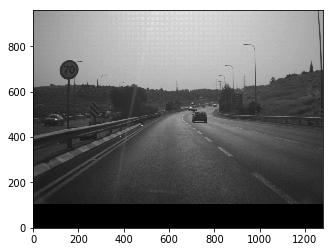

In [25]:
imag = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')
pcruunt= np.dot(df.egoMotion[0][:3,:3],[200 + pc[3]-612,625+pr[3]-508, df.focal[2]]) 
print(pcruunt)
imshow(imag.im , origin="bottom")
#17 -37
x1 = 200 + pc[3]-612
y1 = 625+pr[3]-508
x2 = df.focal[2]*pcruunt[0]/pcruunt[2]
y2 = df.focal[2]*pcruunt[1]/pcruunt[2]
s1= (y2*df.egoMotion[0][:3,3:].ravel()[2]-df.focal[2]*df.egoMotion[1][:3,3:].ravel()[1])/(df.focal[2]*pcruunt[1] - y2*pcruunt[2])
s2 = ((s1*pcruunt[0]+df.egoMotion[0][:3,3:].ravel()[0])/x1) 
print(s1*df.focal[2],s2*df.focal[2])


In [26]:
#[-369.40468867  148.98970529 1608.99895144]